# 1. Import Dependencies

In [3]:
!pip install requests beautifulsoup4 pandas numpy

In [2]:
import json
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Collect Cirque Colors Product Data

In [3]:
# Request HTML page for Cirque Colors - What's New
r = requests.get("https://www.cirquecolors.com/new/")
soup = BeautifulSoup(r.text, "html.parser")
regex = re.compile(".*product-item card*")
results = soup.find_all("article", {"class": regex})

# Existing Cirque Color color words
colors = ["Reds", "Oranges", "Yellows", "Greens", "Blues", 
          "Violets", "Pinks", "Browns", "Monochrome", "Multicolored"]

# Create variable that represents ending of plural words
plural = "s"

# Create list to hold categories from HTML page
categories = []
for category in results:
    data = category.get("data-product-category")
    data_split = re.split("\W+", data)
    categories.extend(data_split)

# Create list to hold best selling Cirque Color colors
cc_colors = []
#for category in categories:
for category in categories:
    for color in colors:
        if category == color:
            cc_colors.append(category)

# Shorten list to 30 elements            
del cc_colors[30:]

# Make plural words singular words
for index, color in enumerate(cc_colors):
    if color[-1] == plural:
        cc_colors[index] = color[:-1]
        
# Create json variable to store data in external file
cirque_colors_json = json.dumps(cc_colors)
with open("cirque_best_seller_Jan22.json", "w") as cirque_json:
    cirque_json.write(cirque_colors_json)       

# 3. Collect OPI Product Data

In [4]:
# Request HTML page for OPI - What's New
ropi = requests.get("https://www.opi.com/whats-new")
soup_opi = BeautifulSoup(ropi.text, "html.parser")
regex_opi = re.compile("\w")
results_opi = soup_opi.find_all("a",{"class":regex_opi})

# Create list to hold data-color-family-primary extractions
data_color = []
for result in results_opi:
    data_opi = result.get("data-color-family-primary")
    data_color.append(data_opi)

# Create list to hold best-selling OPI colors 
opi_colors = []
for color in data_color:
    if color!= None and color!="":
        opi_colors.append(color)

# Shorten list to 30 elements        
del opi_colors[30:]

# Create json variable to store data in external file
opi_colors_json = json.dumps(opi_colors)
with open("opi_best_seller_Jan22.json", "w") as opi_json:
    opi_json.write(opi_colors_json)

# 3. Populate a Pandas DataFrame

In [6]:
# Convert lists to numpy arrays in order to load into DataFrame
np_cc_colors = np.array(cc_colors)
np_opi_colors = np.array(opi_colors)

# Create Dataframe with Cirque Colors and OPI data
df = pd.DataFrame({"Cirque Colors":np_cc_colors, "OPI Colors":np_opi_colors})


In [7]:
# Group colors for each brand by count 
cc_count = df["Cirque Colors"].value_counts()
opi_count = df["OPI Colors"].value_counts()


# 4. Create Bar Charts Using Pandas

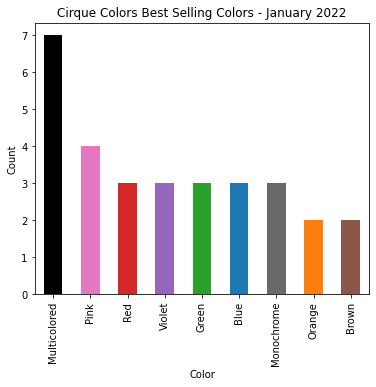

In [8]:
# Assign colors to bar plot indexes
s = pd.Series(["black","tab:pink","tab:red","tab:purple","tab:green","tab:blue","dimgray","tab:orange","tab:brown"], 
              index=["1","2","3","4","5","6","7","8","9"])
cc_chart = cc_count.plot.bar(stacked=False, title="Cirque Colors Best Selling Colors - January 2022", ylabel="Count", xlabel="Color", color=s, figsize=(6,5))

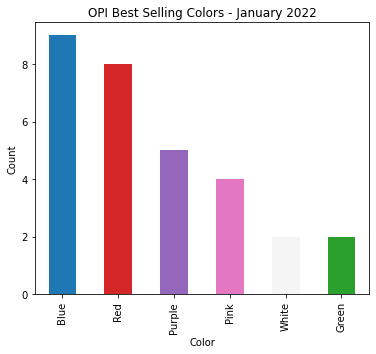

In [147]:
# Assign colors to bar plot indexes
a = pd.Series(["tab:blue","tab:red","tab:purple","tab:pink","whitesmoke","tab:green"], 
              index=["1","2","3","4","5","6"])
opi_chart = opi_count.plot.bar(stacked=False, title="OPI Best Selling Colors - January 2022", ylabel="Count", xlabel="Color", figsize=(6,5), color=a)

# 5. Create Donuts Using Matplotlib

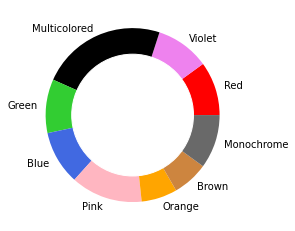

In [49]:
# Create dictionary to hold color and count
cc_dict = {}
for color in cc_colors:
    if color in cc_dict:
        cc_dict[color] += 1
    else:
        cc_dict[color] = 1
 
# Create two lists to hold pie labels and sizes
cc_labels = []
cc_sizes = []
cc_color_list = ["red","violet","black","limegreen","royalblue","lightpink","orange","peru","dimgray"]

for color, count in cc_dict.items():
    cc_labels.append(color)
    cc_sizes.append(count)
    
# Plot data
plt.pie(cc_sizes, labels=cc_labels, colors=cc_color_list)

# Create circle
cc_circle = plt.Circle( (0,0), 0.7, color="white")

# Add the circle to the pie chart
p=plt.gcf()
p.gca().add_artist(cc_circle)

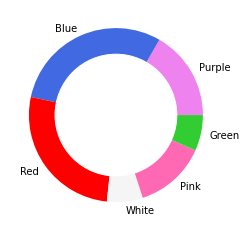

In [50]:
# Create dictionary to hold color and count
opi_dict = {}
for color in opi_colors:
    if color in opi_dict:
        opi_dict[color] += 1
    else:
        opi_dict[color] = 1
        
# Create two lists to hold pie labels and sizes and colors
opi_labels = []
opi_sizes = []
opi_color_list = ["violet", "royalblue", "red", "whitesmoke", "hotpink","limegreen"]

for color, count in opi_dict.items():
    opi_labels.append(color)
    opi_sizes.append(count)

# Create circle
opi_circle = plt.Circle( (0,0), 0.7, color="white")
        
# Plot data
plt.pie(opi_sizes, labels =opi_labels, colors=opi_color_list)

# Add the circle to the pie chart
p=plt.gcf()
p.gca().add_artist(opi_circle)